In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

#renaming
df.rename({'num': 'Heart Disease Stage'}, axis=1, inplace=True)

# source: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Heart Disease Stage
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   920 non-null    int64  
 1   age                  920 non-null    int64  
 2   sex                  920 non-null    object 
 3   dataset              920 non-null    object 
 4   cp                   920 non-null    object 
 5   trestbps             861 non-null    float64
 6   chol                 890 non-null    float64
 7   fbs                  830 non-null    object 
 8   restecg              918 non-null    object 
 9   thalch               865 non-null    float64
 10  exang                865 non-null    object 
 11  oldpeak              858 non-null    float64
 12  slope                611 non-null    object 
 13  ca                   309 non-null    float64
 14  thal                 434 non-null    object 
 15  Heart Disease Stage  920 non-null    int

In [3]:
df.dtypes

id                       int64
age                      int64
sex                     object
dataset                 object
cp                      object
trestbps               float64
chol                   float64
fbs                     object
restecg                 object
thalch                 float64
exang                   object
oldpeak                float64
slope                   object
ca                     float64
thal                    object
Heart Disease Stage      int64
dtype: object

# 2. Data Preprocessing

In [4]:

for column in df:
    unique_val = np.unique(df[column].astype(str).fillna('0'))
    nr_value = len(unique_val)
    if nr_value <= 12:
        print('The number of values for feature {} :{} Types -- {}'.format(column, nr_value,unique_val))
    else:
        print('The number of values for feature {} : {}'.format(column, nr_value))
    

The number of values for feature id : 920
The number of values for feature age : 50
The number of values for feature sex :2 Types -- ['Female' 'Male']
The number of values for feature dataset :4 Types -- ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
The number of values for feature cp :4 Types -- ['asymptomatic' 'atypical angina' 'non-anginal' 'typical angina']
The number of values for feature trestbps : 62
The number of values for feature chol : 218
The number of values for feature fbs :3 Types -- ['False' 'True' 'nan']
The number of values for feature restecg :4 Types -- ['lv hypertrophy' 'nan' 'normal' 'st-t abnormality']
The number of values for feature thalch : 120
The number of values for feature exang :3 Types -- ['False' 'True' 'nan']
The number of values for feature oldpeak : 54
The number of values for feature slope :4 Types -- ['downsloping' 'flat' 'nan' 'upsloping']
The number of values for feature ca :5 Types -- ['0.0' '1.0' '2.0' '3.0' 'nan']
The number of values 

In [5]:
df.isna().sum()

id                       0
age                      0
sex                      0
dataset                  0
cp                       0
trestbps                59
chol                    30
fbs                     90
restecg                  2
thalch                  55
exang                   55
oldpeak                 62
slope                  309
ca                     611
thal                   486
Heart Disease Stage      0
dtype: int64

In [6]:
# Handling Missing Value
# Fill Numerical Columns with their median value

numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill Categorical Columns with Most Frequent Values Mode

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [7]:
df.isna().sum()

id                     0
age                    0
sex                    0
dataset                0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalch                 0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
Heart Disease Stage    0
dtype: int64

In [8]:
numerical_columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'Heart Disease Stage'],
      dtype='object')

In [9]:
categorical_columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [10]:
# Data Cleaning
df.drop('id', axis=1, inplace=True)  # Drop ID column

# Categorical variables to be one-hot encoded
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'Heart Disease Stage']

# One-hot encoding using get_dummies
data_encoded = pd.get_dummies(df, columns = categorical_columns, drop_first = False)

In [11]:
data_encoded.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,Heart Disease Stage_0,Heart Disease Stage_1,Heart Disease Stage_2,Heart Disease Stage_3,Heart Disease Stage_4
0,63,145.0,233.0,150.0,2.3,0.0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
1,67,160.0,286.0,108.0,1.5,3.0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
2,67,120.0,229.0,129.0,2.6,2.0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
3,37,130.0,250.0,187.0,3.5,0.0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
4,41,130.0,204.0,172.0,1.4,0.0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0


In [12]:
# Standardize numerical features - Mean:0 and Sd:1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded)

# 3. Inertia - Elbow Method - Dendrogram

### Inertia
- **Definition:** Inertia measures the sum of squared distances between each data point and the centroid of the cluster to which it belongs. Lower inertia indicates tighter and more cohesive clusters.
- **Role in K-means:** Inertia helps evaluate the quality of clustering by quantifying how well the clusters represent the data points.
### Elbow Method
- **Purpose:** The Elbow Method identifies the optimal number of clusters by plotting inertia against the number of clusters (k). The "elbow point" marks the best trade-off between reducing inertia and increasing the number of clusters.
- **Key Insight:** Adding more clusters always reduces inertia, but after a certain point, the improvement diminishes. The "elbow" is where inertia reduction slows significantly.

### How to choose:
- The "elbow" is the point after which adding more clusters doesn’t significantly reduce inertia.
- The k at this point is your optimal number of clusters.

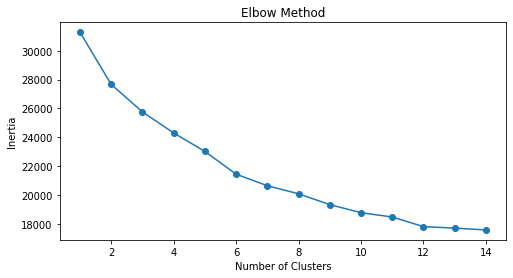

In [13]:
# Elbow Method for Best Number of Clusters

inertia = []
K = range(1,15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


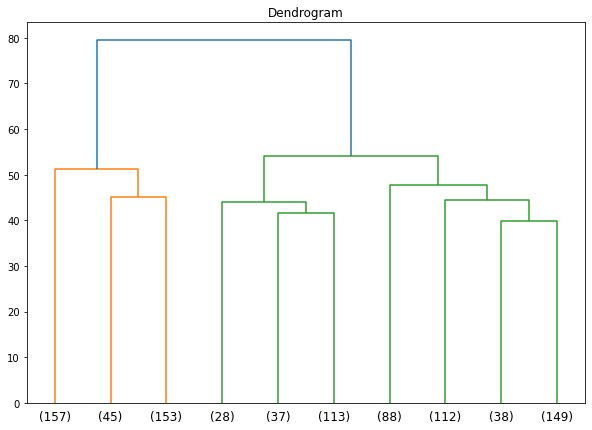

In [14]:
linked = linkage(scaled_features, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Dendrogram')
plt.show()

# K-Mean Running

In [15]:
# Run K-means
optimal_clusters = 5  # Based on elbow/dendrogram
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Heart Disease Stage,Cluster
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,4
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,4
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,4
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,3
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,2


# 5. Principal Component Analysis

## PCA in K-Means
- ***Purpose:*** Principal Component Analysis (PCA) reduces the dimensionality of the dataset while preserving as much variance as possible. In K-Means, PCA helps visualize clusters in 2D or 3D space and improves performance by removing noise and redundant features.
- ***How It Helps:*** PCA transforms data into a set of principal components, which are linear combinations of the original features. This aids K-Means by simplifying complex datasets and making clusters more distinct in reduced dimensions.

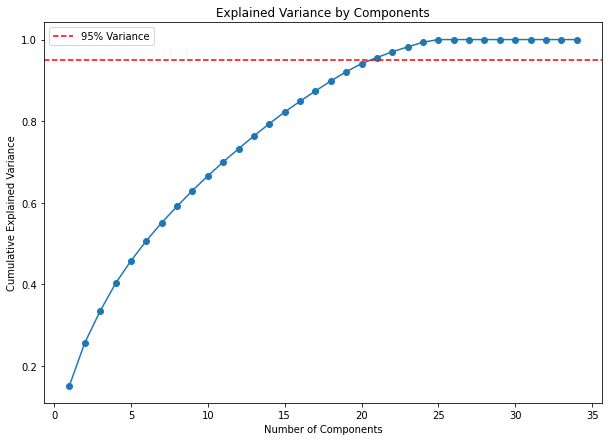

In [16]:
pca = PCA()
pca_features = pca.fit_transform(scaled_features)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

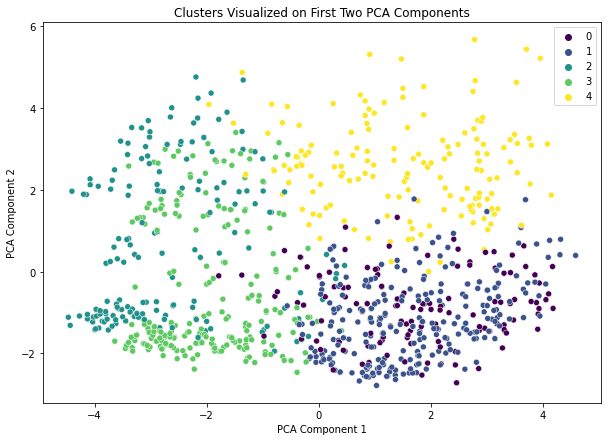

In [17]:
# Visualize Clusters
pca_2d = pca_features[:, :2]
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clusters Visualized on First Two PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# 6. Results Analysis

In [18]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Heart Disease Stage,Cluster
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,4
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,4
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,4
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,3
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,2


In [19]:
# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = [col for col in df.columns if col not in numeric_columns and col != 'Cluster']

# Numeric aggregation
numeric_analysis = df.groupby('Cluster', as_index=False)[numeric_columns].mean()
numeric_analysis = numeric_analysis[['Cluster', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'Heart Disease Stage']]

# Categorical aggregation: Count occurrences of each category per cluster
categorical_analysis = {}
for col in categorical_columns:
    counts = df.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
    counts.columns = [f"{col}_{val}" for val in counts.columns]  # Rename columns to include category values
    categorical_analysis[col] = counts

# Combine categorical counts into a single DataFrame
categorical_analysis_df = pd.concat(categorical_analysis.values(), axis=1).reset_index()

# Combine numeric and categorical summaries
cluster_analysis = pd.merge(numeric_analysis, categorical_analysis_df, on='Cluster', how='left')

# Display the combined analysis
cluster_analysis

,Cluster,age,trestbps,chol,thalch,oldpeak,ca,Heart Disease Stage,sex_Female,sex_Male,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.0,55.459016,130.450820,0.000000,121.237705,0.660656,0.065574,1.819672,10,112,...,85,30,68,54,12,78,32,10,70,42
1,1.0,57.109375,135.421875,205.851562,124.156250,1.294531,0.000000,1.457031,7,249,...,129,105,91,165,29,214,13,10,223,23
2,2.0,51.431250,129.993750,250.337500,148.831250,0.444375,0.156250,0.112500,160,0,...,101,22,136,24,2,104,54,2,152,6
3,3.0,47.854626,129.193833,233.625551,151.837004,0.278855,0.030837,0.167401,0,227,...,179,20,217,10,5,163,59,8,208,11
4,4.0,56.464516,133.722581,246.006452,140.787097,1.539355,1.090323,1.709677,17,138,...,59,2,71,84,15,95,45,16,29,110


# 7. LLM LLama Results Analysis

In [20]:
import typing_extensions

In [27]:
# Asking an LLM so summarize the results

from groq import Groq
# Initialize the Groq client
client = Groq(api_key='')

# Convert DataFrame to JSON or other structured format
data_json = cluster_analysis.to_json(orient='records')

# Define the prompt
prompt = f"Summarize the dataset by providing a concise profile for each cluster (Cluster 0 to Cluster 4) and use proper variable & type names fully. Avoid `` & use - .For each cluster, list: 1.The number of samples in the cluster.2.The average (mean) value for each numeric feature.3.The average and distribution of the value for each categorical feature in percentage form.4.The average and distribution of the 'Heart Disease Stage' column, highlighting the proportion of samples in each stage (0, 1, 2, 3, 4).Present the summary as a list, with one section per cluster, focusing on the main characteristics that distinguish each cluster.\n{data_json}"

# Define the model you want to use
model_name = 'llama-3.1-8b-instant'  # Change this to the model you want to use

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "you are a helpful assistant."
        },
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model=model_name,
)

print(chat_completion.choices[0].message.content)

cluster_summaries = chat_completion.choices[0].message.content

2025-07-02 12:34:58.775 HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**Cluster Summary**

### Cluster 0
- **Number of samples:** 122
- **Average feature values:**
  - age: 55.459
  - trestbps: 130.450
  - chol: 0
  - thalch: 121.238
  - oldpeak: 0.661
  - ca: 0.0656
- **Distribution of categorical features:**
  - sex:
    - Female: 10/122 (8.2%)
    - Male: 112/122 (91.8%)
  - cp:
    - asymptomatic: 98/122 (80.3%)
    - atypical angina: 4/122 (3.3%)
    - non-anginal: 16/122 (13.1%)
    - typical angina: 4/122 (3.3%)
  - fbs:
    - False: 117/122 (95.9%)
    - True: 5/122 (4.1%)
  - restecg:
    - normal: 85/122 (69.7%)
    - st-t abnormality: 30/122 (24.6%)
    - lv hypertrophy: 7/122 (5.7%)
  - exang:
    - False: 68/122 (55.7%)
    - True: 54/122 (44.3%)
  - slope:
    - upsloping: 32/122 (26.2%)
    - flat: 78/122 (63.9%)
    - downsloping: 12/122 (9.8%)
  - thal:
    - normal: 70/122 (57.4%)
    - reversable defect: 42/122 (34.4%)
    - fixed defect: 10/122 (8.2%)
- **Heart Disease Stage distribution:**
  - Stage 0: 0/122 (0%)
  - Stage 1: 82/122 

# 8. Exporting our Models/Results/Data

In [28]:
# Storing our results
import pickle
import json

with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save cluster_summaries as a pickle file
with open('cluster_summaries.pkl', 'wb') as summary_file:
    pickle.dump(cluster_summaries, summary_file)

# Save PCA first two components and cluster labels
pca_2d_df = pd.DataFrame(pca_features[:, :2], columns=['PCA1', 'PCA2'])
pca_2d_df['Cluster'] = df['Cluster'] # Assuming 'Cluster' is in data_encoded

# Save to Excel
pca_2d_df.to_excel('pca_2d.xlsx', index=False)

# Export the cluster_analysis DataFrame to an Excel file
cluster_analysis.to_excel('cluster_analysis.xlsx', index=False)

# Exporting the data with predictions
df.to_excel('main_data_with_pred.xlsx', index=False)

# Export cluster_summaries to a text file
with open('cluster_summaries.txt', 'w') as file:
    file.write(json.dumps(cluster_summaries, indent=4))

# 9. Streamlit App

## Step 1 - Gathering the raw data and preparing it for K-Means

In [29]:
import streamlit as st
import pandas as pd
import plotly.express as px
from PIL import Image
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Feature names based on the training data
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_options = {
    'sex': ['Female', 'Male'],
    'dataset': ['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
    'cp': ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina'],
    'fbs': ['False', 'True'],
    'restecg': ['lv hypertrophy', 'normal', 'st-t abnormality'],
    'exang': ['False', 'True'],
    'slope': ['downsloping', 'flat', 'upsloping'],
    'thal': ['fixed defect', 'normal', 'reversable defect'],
    'Heart Disease Stage': ['0', '1', '2', '3', '4']
}

# Collect user inputs
user_inputs = {}
for feature in numeric_features:
    user_inputs[feature] = st.sidebar.number_input(feature, value=0.0)

for feature, options in categorical_options.items():
    selected_value = st.sidebar.selectbox(feature, options)
    for option in options:
        user_inputs[f"{feature}_{option}"] = 1 if selected_value == option else 0

# Convert user inputs to a DataFrame
input_df = pd.DataFrame([user_inputs])

#input_df

In [30]:
import streamlit as st
import pandas as pd
import plotly.express as px
from PIL import Image
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Set Streamlit page configuration
st.set_page_config(layout="wide")

# Custom CSS to remove the top space
st.markdown(
    """
    <style>
    /* Remove default top margin and padding */
    .block-container {
        padding-top: 0rem;
    }
    .title {
        text-align: center;
        font-size: 32px;
        font-weight: bold;
        color: #333333;
    }
    .subheader {
        text-align: center;
        font-size: 24px;
        font-weight: bold;
        color: #555555;
    }
    .scrollable-summary {
        height: 420px;
        overflow-y: auto;
        border: 1px solid #ccc;
        padding: 10px;
        background-color: #f9f9f9;
    }
    </style>
    """,
    unsafe_allow_html=True,
)

# Load pre-trained model, scaler, and cluster summaries
with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Load PCA data from Excel
pca_2d_df = pd.read_excel('pca_2d.xlsx')

# Load cluster_analysis data from Excel
cluster_analysis = pd.read_excel('cluster_analysis.xlsx')

# Load cluster_summaries from pickle
try:
    with open('cluster_summaries.pkl', 'rb') as summary_file:
        cluster_summaries = pickle.load(summary_file)
except FileNotFoundError:
    cluster_summaries = None
    st.error("Cluster summaries file not found. Please generate it in the base code.")

# Load images
sidebar_image = Image.open('Pic1.png')
main_image = Image.open('Pic2.png')

# Sidebar for user inputs
st.sidebar.image(sidebar_image, use_column_width=True)
st.sidebar.header("Cluster Visualization")

# Feature names based on the training data
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_options = {
    'sex': ['Female', 'Male'],
    'dataset': ['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
    'cp': ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina'],
    'fbs': ['False', 'True'],
    'restecg': ['lv hypertrophy', 'normal', 'st-t abnormality'],
    'exang': ['False', 'True'],
    'slope': ['downsloping', 'flat', 'upsloping'],
    'thal': ['fixed defect', 'normal', 'reversable defect'],
    'Heart Disease Stage': ['0', '1', '2', '3', '4']
}

# Collect user inputs
user_inputs = {}
for feature in numeric_features:
    user_inputs[feature] = st.sidebar.number_input(feature, value=0.0)

for feature, options in categorical_options.items():
    selected_value = st.sidebar.selectbox(feature, options)
    for option in options:
        user_inputs[f"{feature}_{option}"] = 1 if selected_value == option else 0

# Convert user inputs to a DataFrame
input_df = pd.DataFrame([user_inputs])

# Main page layout
st.markdown('<h1 class="title">Cluster Analysis with PCA Visualization</h1>', unsafe_allow_html=True)
st.image(main_image, use_column_width=True)

# First Section: Split into two columns
left_col, right_col = st.columns(2)

with left_col:
    st.markdown('<h2 class="subheader">Cluster Visualization</h2>', unsafe_allow_html=True)
    fig = px.scatter(
        pca_2d_df, 
        x='PCA1', 
        y='PCA2', 
        color='Cluster', 
        title="Clusters Visualized with PCA", 
        labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'},
        template='plotly'
    )
    st.plotly_chart(fig)

with right_col:
    st.markdown('<h2 class="subheader">Cluster Summaries</h2>', unsafe_allow_html=True)
    # Start the scrollable div
    summary_content = '<div class="scrollable-summary">'
    if isinstance(cluster_summaries, str):
        summary_content += f"<p>{cluster_summaries}</p>"
    elif cluster_summaries:
        for key, value in cluster_summaries.items():
            summary_content += f"<p><strong>Cluster {key}</strong>: {value}</p>"
    else:
        summary_content += "<p>No cluster summaries available.</p>"
    summary_content += "</div>"
    st.markdown(summary_content, unsafe_allow_html=True)

# Second Section: Split into two columns
second_left_col, second_right_col = st.columns(2)

with second_left_col:
    st.subheader("Determine Your Cluster")
    if st.button("Cluster Me"):
        # Predict the user's cluster
        cluster_id = kmeans.predict(scaler.transform(input_df))[0]
        st.success(f"You belong to Cluster {cluster_id}.")

with second_right_col:
    st.subheader("Cluster Analysis Table")
    # Display the cluster_analysis DataFrame with horizontal scrolling
    st.dataframe(cluster_analysis.head(), height=212)

#Streamlit run K_Means.py